In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [29]:
df = pd.read_csv("/content/drive/My Drive/sem5/NLP/midsem/Constraint_English_Train.csv", dtype=str)
df1 = pd.read_csv("/content/drive/My Drive/sem5/NLP/midsem/Constraint_English_Val.csv", dtype=str)

In [30]:
df1

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake
2136,2137,Current understanding is #COVID19 spreads most...,real
2137,2138,Nothing screams “I am sat around doing fuck al...,fake
2138,2139,Birx says COVID-19 outbreak not under control ...,fake


In [31]:
lab = {'fake': 1,'real': 0}
df.label = [lab[item] for item in df.label]
df1.label = [lab[item] for item in df1.label]

In [32]:
df

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,0
1,2,States reported 1121 deaths a small rise from ...,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,5,Populous states can generate large case counts...,0
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,1
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,1
6417,6418,_A post claims a COVID-19 vaccine has already ...,1
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,1


In [60]:
X_train = np.array(df.tweet)
y_train = np.array(df.label)

In [61]:
X_test = np.array(df1.tweet)
y_test = np.array(df1.label)

In [62]:
count_vect = CountVectorizer(lowercase=False)
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)
acc = accuracy_score(y_test,y_pred)
print("Random Forests")
print ("Accuracy", float("{0:.2f}".format(acc*100)))

Random Forests
Accuracy 92.15


In [63]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()

In [64]:
tn, fp, fn, tp

(1070, 50, 118, 902)

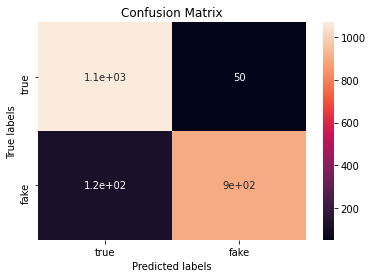

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['true', 'fake']); ax.yaxis.set_ticklabels(['true', 'fake']);

In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tfidf.todense(),y_train)
y_pred = nb.predict(X_test_tfidf.todense())
acc = accuracy_score(y_test,y_pred)
print("Naive Bayes")
print ("Accuracy", float("{0:.2f}".format(acc*100)))

Naive Bayes
Accuracy 89.44


In [67]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1016, 104, 122, 898)

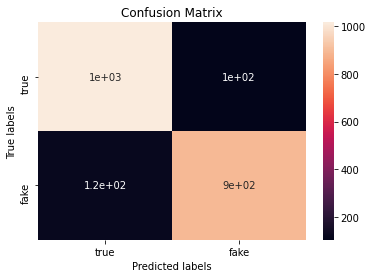

In [68]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['true', 'fake']); ax.yaxis.set_ticklabels(['true', 'fake']);